<h1 align='center'><b><font color='indianred'></p>Spam Detection HW - File 1</b></h1>

<font color = 'indianred' size = 4 > </font>


In [112]:
# Import necessary libraries
import pandas as pd
from pathlib import Path

# Import the joblib library for saving and loading models
import joblib

# Import scikit-learn classes for building models
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.model_selection import train_test_split


# Import the scipy library for working with sparse matrices
from scipy.sparse import csr_matrix

# for visuallization
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# for treating class imbalance:
from sklearn.utils import class_weight


In [102]:
# !pip install wordcloud

In [ ]:
%load_ext autoreload
%autoreload 2

In [91]:
import sys
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive')

    !pip install -U nltk -qq
    !pip install -U spacy -qq
    !python -m spacy download en_core_web_sm -qq

    basepath = '/content/drive/MyDrive/data'
    sys.path.append('/content/drive/MyDrive/data/custom-functions')
else:
    basepath = '/Users/rechitasingh/Downloads/BUAN 6342 - NLP/0_Data'
    sys.path.append(
        '/Users/rechitasingh/Downloads/BUAN 6342 - NLP/0_Python_Scripts')


In [96]:
base_folder = Path(basepath)
data_folder = base_folder
model_folder = base_folder
custom_functions = base_folder

In [149]:
# Importing custom functions (Available from class notes)
import custom_preprocessor_mod as cp
from plot_learning_curve import plot_learning_curve
from featurizer import ManualFeatures


# <font color='indianred'> **Q1: Load the dataset  (1 Point)**

- For this Hw you will usespam dataset from kaggle which can be found from [this](https://www.kaggle.com/uciml/sms-spam-collection-dataset) link. You can download this data and either upload it in google drive or in colab workspace. Load the data in pandas dataframe.

- There are only two useful columns. These columns are related to (1) label (ham and spam) and the (2) text of email.

- Rename columns as label and message

- Find the %  ham amd spam in the data.





#### <font color ='blue'> Load the data and manipulating as required

In [64]:
# Load the dataset into a Pandas DataFrame
data = pd.read_csv('/Users/rechitasingh/Downloads/BUAN 6342 - NLP/Assignment/2/spam.csv', encoding='latin-1')

#re-adjusting data
data = data.iloc[:,[0,1]]

In [66]:
# Select only the 'v1' and 'v2' columns and rename them
data = data[['v1', 'v2']]
data.columns = ['label', 'message']

In [69]:
# Peak at data
print('Shape of Data from kaggle: ', data.shape)
data.head()

Shape of Data from kaggle:  (5572, 2)


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [36]:
# Find the percentage of ham and spam in the data
ham_percentage = (data['label'] == 'ham').sum() / len(data) * 100
spam_percentage = (data['label'] == 'spam').sum() / len(data) * 100

print(f'Percentage of ham: {ham_percentage:.2f}%')
print(f'Percentage of spam: {spam_percentage:.2f}%')


Percentage of ham: 86.59%
Percentage of spam: 13.41%


**Observation:** Here the dataset is highly imbalanced!

# <font color='indianred'> **Q2 : Provide the metric for evaluating model (1 Point)**</font>

As you will notice, the  data is highly imbalanced (most messages are labelled as ham and only few are labelled as spam). Always predicting ham will give us very good accuracy (close to 90%). So you need to choose a different metric.

Task: Provde the metric you will choose to evaluate your model. Explain why this is an appropriate metric for this case.

### <font color ='blue'>My take on this:
Since the dataset is imbalanced, accuracy is not suitable. **I'll choose F1-score** as the evaluation metric **as 
F1-score balances precision and recall, making it appropriate for imbalanced datasets.**


# <font color='indianred'> **Q3 : Classification Pipelines (18 Points)**</font>

In the previous lectures you learned Data processing, Featurization such as CountVectorizer, TFIDFVectorizer, and also Feature Engineering.
* You will now use folllowing methods to create fearures which you can use in your model.

    1. Sparse Embeddings (TF-IDF) (6 Points)
    2. Feature Engineering (see examples below) (6 Points)
    3. Sparse Embeddings (TF-IDF) + Feature Engineering (6 Points)

**Approach:**

<font color='indianred'> ****Use a smaller subset of dataset (e.g. 5-10 %) to evaluate the three pipelines . Based on your analysis (e.g. model score, learning curves) , choose one pipeline from the three. Provde your rational for choosing the pipleine. Train only the final pipeline on randomly selected larger subset (e.g. 40%) of the data.** </font>

**Requirements:**

1. You can use any ML model (Logistic Regression, XgBoost) for the classification. You will need to tune the **model for imbalanced dataset** (The link on XGBoost tutorial for imbalanced data: https://machinelearningmastery.com/xgboost-for-imbalanced-classification/).

2. For feature engineering, you can choose from the examples below. You do not  have to use all of them. You can add other featues as well. Think about what faetures can distinguish a spam from a regular email. Some examples :

>> Count of following  (Words, characters, digits, exclamation marks, numbers, Nouns, ProperNouns, AUX, VERBS, Adjectives, named entities, spelling mistakes (see the link on how to get spelling mistakes https://pypi.org/project/pyspellchecker/).

3. For Sparse embeddings you will use **tfidf vectorization**. You need to choose appopriate parameters e.g. min_df, max_df, max_faetures, n-grams etc.).

4. Think carefully about the pre-processing you will do.

Tip: <font color = 'indianred'>**Using GridSearch for hyperparameter tuning might take a lot of time. Try using RandomizedSearch.**</font> You can also explore faster implementation of Gridsearch and RandomizedSearch in sklearn:

1. [Halving Grid Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingGridSearchCV.html?highlight=halving#sklearn.model_selection.HalvingGridSearchCV)

2. [HalvingRandomSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingRandomSearchCV.html?highlight=halving#sklearn.model_selection.HalvingRandomSearchCV)





 ## <font color ='blue'>Create a train and test split

**Note**: Since the **data is highly imbalanced**, randomly splitting the data may not give proper representation for both labels. **To avoid this problem, I am chosing stratified sampling** approach to split the dataset to ensures that the class distribution in both sets is representative of the original dataset

In [85]:
# Splitting the data in test and train set
# X is your feature matrix, y is your target variable
X = data['message'].values
y = data['label'].values

X_train_org, X_test_org, y_train_org, y_test_org = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


In [268]:
len(X_train_org)
len(y_train_org)

3900

###  <font color ='blue'>Concatinating train and test message and labels to check the distribution representation

In [86]:
#combining to X_train and y_train to check the distribution in training set 

X_train_concat = pd.DataFrame({'message': X_train_org, 'label': y_train_org})
X_train_concat.head()

,message,label
0,"Goal! Arsenal 4 (Henry, 7 v Liverpool 2 Henry ...",spam
1,I dont. Can you send it to me. Plus how's mode.,ham
2,Aah bless! How's your arm?,ham
3,Oh k. . I will come tomorrow,ham
4,Yup ok...,ham


In [87]:
#combining to X_test and y_test to check the distribution in test set 

X_test_concat = pd.DataFrame({'message': X_test_org, 'label': y_test_org})
X_test_concat.head()

,message,label
0,You are a winner U have been specially selecte...,spam
1,I don't know but I'm raping dudes at poker,ham
2,We tried to contact you re your reply to our o...,spam
3,"St andre, virgil's cream",ham
4,I have had two more letters from . I will copy...,ham


### <font color ='blue'> Checking the proper representation of ham and spam in train and test data

In [88]:
ham_pct = (X_train_concat['label'] == 'ham').sum() / len(X_train_concat) * 100
spam_pct = (X_train_concat['label'] == 'spam').sum() / len(X_train_concat) * 100

print('Distribution of train dataset')
print(f'Percentage of ham: {ham_pct:.2f}%')
print(f'Percentage of spam: {spam_pct:.2f}%')

Distribution of train dataset
Percentage of ham: 86.59%
Percentage of spam: 13.41%


In [50]:
ham_pct = (X_test_concat['label'] == 'ham').sum() / len(X_test_concat) * 100
spam_pct = (X_test_concat['label'] == 'spam').sum() / len(X_test_concat) * 100

print('Distribution of test dataset')
print(f'Percentage of ham: {ham_pct:.2f}%')
print(f'Percentage of spam: {spam_pct:.2f}%')

Distribution of test dataset
Percentage of ham: 86.60%
Percentage of spam: 13.40%


**Obervation:** Both Train and test dataset seems to have similar distribution as the original dataset after applying stratified sampling

### <font color ='blue'> Creating smaller datasets for this task
    
   ***Also maintaining the proportion of spam and ham in the smaller dataset***

In [56]:
train_smaller = X_train_concat.sample(frac=0.1, replace=True, random_state=1)

In [58]:
test_smaller = X_test_concat.sample(frac=0.1, replace=True, random_state=1)

 ## <font color ='blue'> Exploring the Dataset

In [60]:
# Printing basic info
train_smaller.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 1061 to 1845
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  390 non-null    object
 1   label    390 non-null    object
dtypes: object(2)
memory usage: 9.1+ KB


#### <font color ='blue'> Checking value count per label

In [84]:
# Checking distribution of class labels for train dataset
print('Value count of smaller train data: \n', train_smaller['label'].value_counts(),'\n')
print('Value count of smaller test data: \n', test_smaller['label'].value_counts())


Value count of smaller train data: 
 ham     335
spam     55
Name: label, dtype: int64 

Value count of smaller test data: 
 ham     146
spam     21
Name: label, dtype: int64


#### <font color ='blue'> Checking proportions compared to original data AND shape

In [75]:
# proportion in training set
ham_pct = (train_smaller['label'] == 'ham').sum() / len(train_smaller) * 100
spam_pct = (train_smaller['label'] == 'spam').sum() / len(train_smaller) * 100

print('Shape of smaller train Data: ', train_smaller.shape,'\n')
print('Distribution of smaller train dataset')
print(f'Percentage of ham: {ham_pct:.2f}%')
print(f'Percentage of spam: {spam_pct:.2f}%')

Shape of smaller train Data:  (390, 2) 

Distribution of smaller train dataset
Percentage of ham: 85.90%
Percentage of spam: 14.10%


In [76]:
# proportion in test set
ham_pct = (test_smaller['label'] == 'ham').sum() / len(test_smaller) * 100
spam_pct = (test_smaller['label'] == 'spam').sum() / len(test_smaller) * 100

print('Shape of smaller test Data: ', test_smaller.shape,'\n')
print('Distribution of smaller test dataset')
print(f'Percentage of ham: {ham_pct:.2f}%')
print(f'Percentage of spam: {spam_pct:.2f}%')

Shape of smaller test Data:  (167, 2) 

Distribution of smaller test dataset
Percentage of ham: 87.43%
Percentage of spam: 12.57%


#### Point to Note:  
1. The class distribution in both smaller datasets are representative of the original dataset

2. **Final datasets** to be used throughout this workbook will be **derived from train_smaller** and **test_smaller**

3. **Classes are highly imbalanced**

### <font color = 'blue'> Data Visualization

#### Most common words used for Spam Text in trainning set

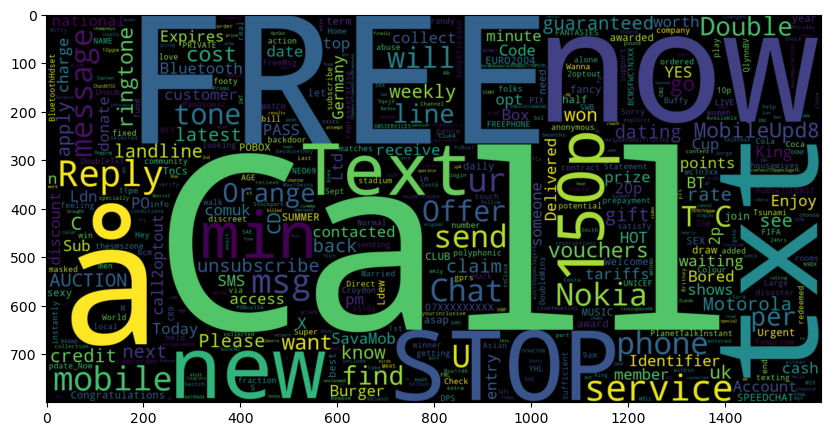

In [109]:
plt.figure(figsize = (10,10)) # Text that is not fraudulent(0)
wc = WordCloud(width = 1600 , 
               height = 800 , 
               max_words = 500,
               background_color='black').generate(" ".join(train_smaller[train_smaller.label == 'spam'].message))
plt.imshow(wc , interpolation = 'bilinear')

#### Most common words used for NOT Spam (ham) Text in trainning set

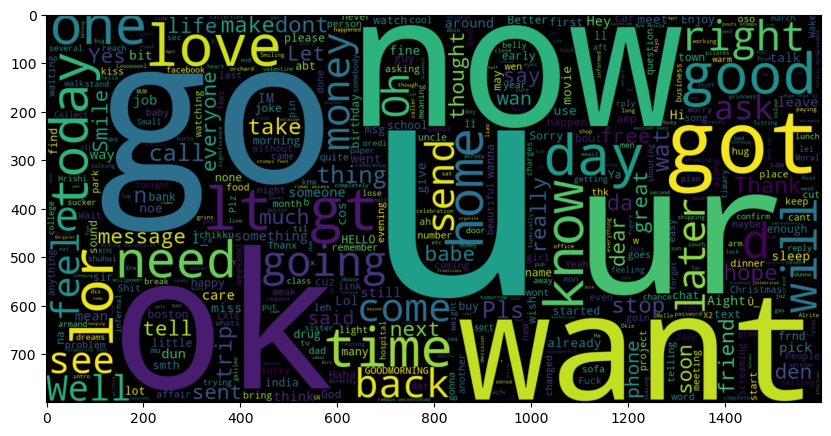

In [110]:
plt.figure(figsize = (10,10)) # Text that is not fraudulent(0)
wc = WordCloud(width = 1600 , 
               height = 800 , 
               max_words = 500,
               background_color='black').generate(" ".join(train_smaller[train_smaller.label == 'ham'].message))
plt.imshow(wc , interpolation = 'bilinear')

 ## <font color ='blue'> Classification Pipeline

 ### <font color ='blue'> PreProcessing

In [89]:
X_train = train_smaller['message'].values
X_test = test_smaller['message'].values
y_train = train_smaller['label'].values
y_test = test_smaller['label'].values

print(f'X_train: {X_train.shape} y_train: {y_train.shape}')
print(f'X_test: {X_test.shape} y_test: {y_test.shape}')


X_train: (390,) y_train: (390,)
X_test: (167,) y_test: (167,)


In [148]:
cp.SpacyPreprocessor??

In [98]:
# Using Custom preprocessor used in class on training dataset
X_train_processed = cp.SpacyPreprocessor(
    model='en_core_web_sm').transform(X_train)

# save this to a file
file_X_train_processed_sparse_embed = data_folder / \
    'x_train_processed_sparse_embed.pkl'
joblib.dump(X_train_processed, file_X_train_processed_sparse_embed)



['/Users/rechitasingh/Downloads/BUAN 6342 - NLP/0_Data/x_train_processed_sparse_embed.pkl']

In [99]:
# Using Custom preprocessor used in class on test dataset
X_test_processed = cp.SpacyPreprocessor(model='en_core_web_sm').transform(X_test)

# save  this to a file
file_X_test_processed_sparse_embed = data_folder / 'x_test_processed_sparse_embed.pkl'
joblib.dump(X_test_processed, file_X_test_processed_sparse_embed)


['/Users/rechitasingh/Downloads/BUAN 6342 - NLP/0_Data/x_test_processed_sparse_embed.pkl']

## <font color = 'blue'>Pipeline 1 - Sparse Embeddings (TF-IDF) (6 Points) </font>

   **Treating class imbalance using Cost-Sensitive Learning**
   
   **Also Using F1 score as metric for scoring**

In [178]:
# Create class weights based on the class imbalance
class_weights = class_weight.compute_class_weight('balanced', classes=['ham', 'spam'], y=y_train)


In [179]:
# Creating a pipeline with cost-sensitive Learning and Logistic Regression
pipeline_1 = Pipeline([
    ('vectorizer', TfidfVectorizer(analyzer='word', token_pattern=r"[\S]+")),
    ('classifier', LogisticRegression(max_iter=10000, class_weight={'ham': 1, 'spam': class_weights[1]})),])



In [180]:
# Parameter grid
param_grid_classifier_1 = {
    'vectorizer__max_features': [1000, 2000, 5000],
    'classifier__C': [1, 10, 100],
}

In [273]:
# Use F1 score as the scoring metric
grid_classifier_1 = GridSearchCV(
    estimator=pipeline_1, param_grid=param_grid_classifier_1, cv=5, scoring='f1_macro')



In [274]:
# Fit the model on training data
# X_train_processsed_sparse_embed = joblib.load(file_X_train_processed_sparse_embed)
grid_classifier_1.fit(X_train_processed, y_train)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer',
                                        TfidfVectorizer(token_pattern='[\\S]+')),
                                       ('classifier',
                                        LogisticRegression(class_weight={'ham': 1,
                                                                         'spam': 3.5454545454545454},
                                                           max_iter=10000))]),
             param_grid={'classifier__C': [1, 10, 100],
                         'vectorizer__max_features': [1000, 2000, 5000]},
             scoring='f1_macro')

In [275]:
# Get best parameters
print(f'Best cross-validation F1 score: {grid_classifier_1.best_score_:.2f}')
print("\nBest parameters: ", grid_classifier_1.best_params_)
print("\nBest estimator: ", grid_classifier_1.best_estimator_)


Best cross-validation F1 score: 0.85

Best parameters:  {'classifier__C': 10, 'vectorizer__max_features': 2000}

Best estimator:  Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_features=2000, token_pattern='[\\S]+')),
                ('classifier',
                 LogisticRegression(C=10,
                                    class_weight={'ham': 1,
                                                  'spam': 3.5454545454545454},
                                    max_iter=10000))])


### <font color='blue'> Checking CV and Training score

In [276]:
# store the model in variables
best_estimator_pipeline1 = grid_classifier_1.best_estimator_
complete_grid_pipeline1 = grid_classifier_1


In [277]:
# Checking CV and Training score

# let's check the train scores
print('train scores: ',best_estimator_pipeline1.score(
    X_train_processed, y_train))

# let's check the cross validation score
print('cross validation score: ',complete_grid_pipeline1.best_score_)


train scores:  1.0
cross validation score:  0.8532028812105764


### <font color='blue'> Evaluate model on test set (transformed)

In [278]:
# Evaluate model on test set
# Here I am using the transformed test set

y_test_pred = grid_classifier_1.predict(X_test_processed)

In [279]:
# Classification report for test set using F1 score
print('\nTest set classification report (F1 score):\n\n',
      classification_report(y_test, y_test_pred))


Test set classification report (F1 score):

               precision    recall  f1-score   support

         ham       0.97      1.00      0.98       146
        spam       1.00      0.76      0.86        21

    accuracy                           0.97       167
   macro avg       0.98      0.88      0.92       167
weighted avg       0.97      0.97      0.97       167



### <font color='blue'>Inferring the classification report: </font>


The classification report provides a summary of the performance of a classification model on a test set. Let's interpret the different metrics in this classification report:

**Precision:**

1. Precision measures how many of the predicted positive instances were actually positive.
2. For the 'ham' class, the precision is 0.97, indicating that 97% of the instances predicted as 'ham' were correctly classified as 'ham.'
3. For the 'spam' class, the precision is 1.00, which means that all instances predicted as 'spam' were correctly classified as 'spam.'

**Recall:**
1. Recall, also known as sensitivity or true positive rate, measures how many of the actual positive instances were correctly predicted.
2. For the 'ham' class, the recall is 1.00, indicating that all actual 'ham' instances were correctly predicted as 'ham.'
3. For the 'spam' class, the recall is 0.76, meaning that 76% of the actual 'spam' instances were correctly predicted as 'spam.'

**F1-Score:**
1. The F1-score is the harmonic mean of precision and recall and provides a balanced measure of model performance.
2. For the 'ham' class, the F1-score is 0.98, which is a high value, indicating good performance in terms of precision and recall.
3. For the 'spam' class, the F1-score is 0.86, which is also a relatively high score but slightly lower than for the 'ham' class.

In summary, **this classification report suggests that the model performs very well for the 'ham' class** with high precision, recall, and F1-score. 

**For the 'spam' class, while precision and F1-score are good, recall is relatively lower, indicating some difficulty in correctly identifying 'spam' instances.** The overall model performance, as measured by accuracy and the F1-score, is quite good.

### <font color ='blue'>**Plot Learning Curve**

<module 'matplotlib.pyplot' from '/Users/rechitasingh/anaconda3/lib/python3.11/site-packages/matplotlib/pyplot.py'>

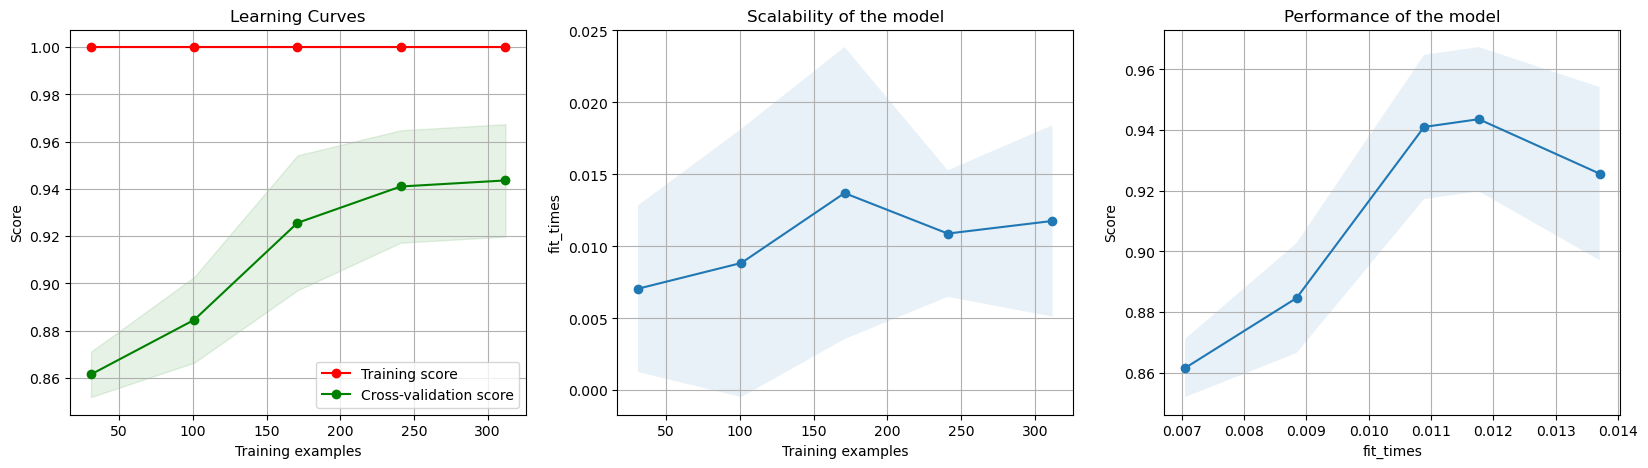

In [188]:
# plot learning curces
plot_learning_curve(best_estimator_pipeline1, 'Learning Curves',
                    X_train_processed, y_train, n_jobs=-1)


#### <font color='blue'> INFERENCE:</font> The learning curve shows that this is the case of overfitting. This means that our model is capable of handling the datasets variablitities and we can deal with it by supplying more data

## <font color = 'blue'> SAve the model down

In [189]:
# Establishing path for saving model 
model_best_estimator_pipeline1 = model_folder / \
    'pipeline1_best_estimator.pkl'
model_complete_grid_pipeline1 = model_folder / \
    'pipeline1_complete_grid.pkl'


In [190]:
# Saving down model

joblib.dump(grid_classifier_1.best_estimator_,
            model_best_estimator_pipeline1)
joblib.dump(grid_classifier_1, model_complete_grid_pipeline1)


['/Users/rechitasingh/Downloads/BUAN 6342 - NLP/0_Data/pipeline1_complete_grid.pkl']

## <font color = 'blue'>Pipeline 2 - Feature Engineering (6 Points)

**For feature engineering, using the ManualFeatures custom function created in class.**

This takes care of the below steps:
  1. number of words
  2. number of characters
  3. number of characters without space
  4. average word length
  5. number of digits
  6. number of numbers
  7. number of nouns or propernouns
  8. number of aux
  9. number of verbs
  10. number of adjectives
  11. number of ner (entiites)

In [150]:
ManualFeatures??


In [151]:
# Using custom featurizer for FeatureEngineering
featurizer = ManualFeatures(spacy_model='en_core_web_sm')

In [158]:
%%time
X_train_features, feature_names = featurizer.fit_transform(X_train)

In [159]:
%%time
X_train_features[0:3]


CPU times: user 11 µs, sys: 1 µs, total: 12 µs
Wall time: 21 µs


array([[  8.        ,  33.        ,  26.        ,   2.88888889,
          0.        ,   0.        ,   0.        ,   3.        ,
          0.        ,   2.        ,   0.        ],
       [ 39.        , 184.        , 146.        ,   3.65      ,
          0.        ,   0.        ,   2.        ,   6.        ,
          6.        ,   4.        ,   3.        ],
       [ 22.        ,  97.        ,  76.        ,   3.30434783,
          5.        ,   4.        ,   3.        ,   4.        ,
          2.        ,   7.        ,   0.        ]])

In [160]:
feature_names

['count_words',
 'count_characters',
 'count_characters_no_space',
 'avg_word_length',
 'count_digits',
 'count_numbers',
 'noun_count',
 'aux_count',
 'verb_count',
 'adj_count',
 'ner']

In [162]:
# Create class weights based on the class imbalance
# Here class 'spam' will be given more weightage than ham for misclassification

class_weights = class_weight.compute_class_weight('balanced', classes=['ham', 'spam'], y=y_train)


In [163]:
# Creating a pipeline with cost-sensitive Logistic Regression

classifier_2 = Pipeline([
    ('classifier', LogisticRegression(max_iter=10000, class_weight={'ham': 1, 'spam': class_weights[1]})),
])


In [164]:
# Parameter grid:
param_grid_classifier_2 = {'classifier__C': [0.01, 10, 1000, 100000]}

In [169]:
# Specify grid search
grid_classifier_2 = GridSearchCV(estimator=classifier_2,
                                 param_grid=param_grid_classifier_2,
                                 cv=5, scoring = 'f1_macro')

In [170]:
# Fit the model:
# Fit the model on training data
grid_classifier_2.fit(X_train_features, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        LogisticRegression(class_weight={'ham': 1,
                                                                         'spam': 3.5454545454545454},
                                                           max_iter=10000))]),
             param_grid={'classifier__C': [0.01, 10, 1000, 100000]},
             scoring='f1_macro')

In [171]:
# Get best params

print(f'Best cross-validation score: {grid_classifier_2.best_score_:.2f}')
print("\nBest parameters: ", grid_classifier_2.best_params_)
print("\nBest estimator: ", grid_classifier_2.best_estimator_)

Best cross-validation score: 0.93

Best parameters:  {'classifier__C': 0.01}

Best estimator:  Pipeline(steps=[('classifier',
                 LogisticRegression(C=0.01,
                                    class_weight={'ham': 1,
                                                  'spam': 3.5454545454545454},
                                    max_iter=10000))])


### <font color ='blue'>**Plot Learning Curve**

In [193]:
# storing model in variables:

best_estimator_pipeline2 = grid_classifier_2.best_estimator_
complete_grid_pipeline2 = grid_classifier_2

<module 'matplotlib.pyplot' from '/Users/rechitasingh/anaconda3/lib/python3.11/site-packages/matplotlib/pyplot.py'>

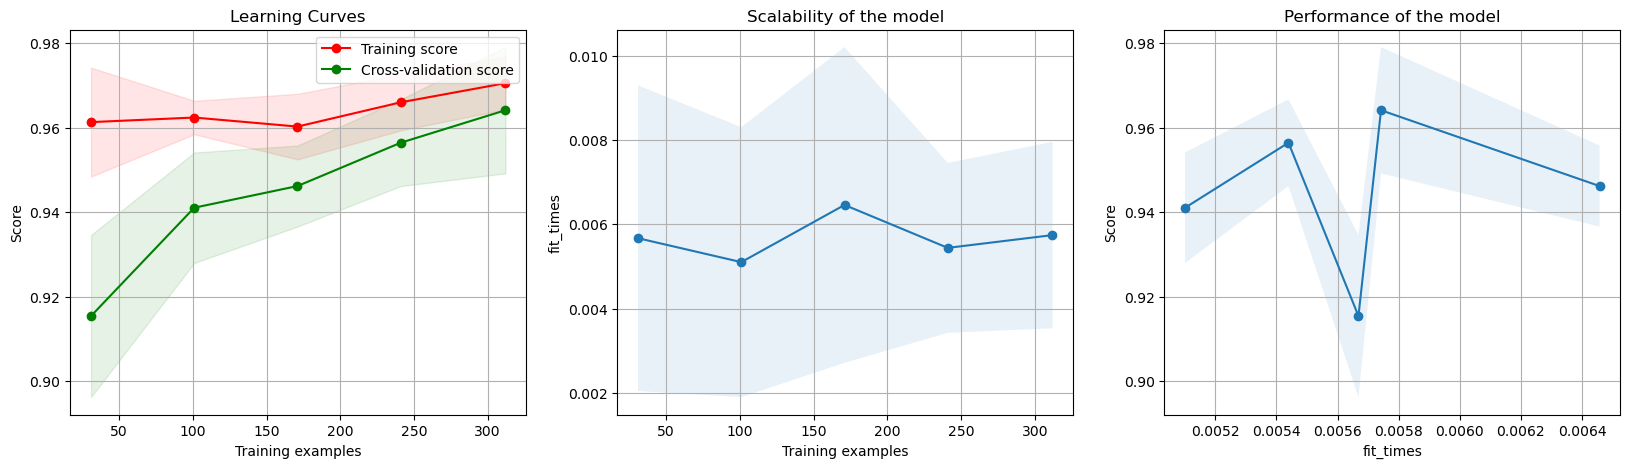

In [194]:
# plot learning curces
plot_learning_curve(best_estimator_pipeline2, 'Learning Curves',
                    X_train_features, y_train, n_jobs=-1)


#### <font color = 'blue'> INFERENCE:</font> The learning curve seems to go up as the dataset size is increasing. It seems that with more data, the model will perform better

### <font color = 'blue'>**Check Cross Validation Score and Train Score**

In [196]:
# let's check the train scores
print('train scores: ',best_estimator_pipeline2.score(X_train_features, y_train))

# let's check the cross validation score
print('cross validation score: ', complete_grid_pipeline2.best_score_)


train scores:  0.9717948717948718
cross validation score:  0.9255027869733752


### <font color = 'blue'>**Evaluate model on test set (transformed)**

In [198]:
# Evaluate model on test set
# Here I am using the transformed test set

# Final Pipeline
def final_pipeline(text, best_estimator_pipeline2):
    features, feature_names = featurizer.fit_transform(text)
    predictions = best_estimator_pipeline2.predict(features)
    return predictions

In [200]:
# predicted values for Test data set
y_test_pred2 = final_pipeline(X_test, best_estimator_pipeline2)


/Users/rechitasingh/Downloads/BUAN 6342 - NLP/0_Python_Scripts/custom_preprocessor_mod.py:90: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


### <font color ='blue'>**Classification report for test dataset**

In [201]:
print('\nTest set classification report:\n\n',
      classification_report(y_test, y_test_pred2))



Test set classification report:

               precision    recall  f1-score   support

         ham       0.99      0.99      0.99       146
        spam       0.95      0.90      0.93        21

    accuracy                           0.98       167
   macro avg       0.97      0.95      0.96       167
weighted avg       0.98      0.98      0.98       167



### <font color='blue'>Comparison with Previous Classification Report:</font>

1. In the new classification report, the **Pipeline 2 model has slightly improved performance for the 'spam' class**, as indicated by higher precision, recall, and F1-score compared to the previous report.


2. For the 'ham' class, the performance remains consistently high in both reports.



3. The overall accuracy is slightly higher in the new report (0.98 vs. 0.97), indicating better overall classification accuracy.



4. The macro average F1-score and weighted average F1-score are also slightly higher in the new report, suggesting improved overall model performance.



## <font color = 'blue'> SAve the model down - Pipeline 2
   

In [203]:
# Establishing path for saving model 
model_best_estimator_pipeline2 = model_folder / \
    'pipeline2_best_estimator.pkl'
model_complete_grid_pipeline2 = model_folder / \
    'pipeline2_complete_grid.pkl'


In [204]:
# Saving down model

joblib.dump(grid_classifier_2.best_estimator_,
            model_best_estimator_pipeline2)
joblib.dump(grid_classifier_2, model_complete_grid_pipeline2)


['/Users/rechitasingh/Downloads/BUAN 6342 - NLP/0_Data/pipeline2_complete_grid.pkl']

## <font color = 'blue'>Pipeline 3 - Sparse Embeddings (TF-IDF) + Feature Engineering (6 Points)

### <font  color ='blue'>**Combine Manual Features and tfidf features**

In [205]:
# Loading Space embedded training data (transformed) from Part1
X_train_processed_sparse_embed = joblib.load(file_X_train_processed_sparse_embed)


In [208]:
# Combining text and non text data from Part1 and PArt2
X_train_final = pd.concat((pd.DataFrame(X_train_processed_sparse_embed, columns=['cleaned_text']),
                           pd.DataFrame(X_train_features, columns=feature_names)), axis=1)


In [207]:
X_train_final.head()


,cleaned_text,count_words,count_characters,count_characters_no_space,avg_word_length,count_digits,count_numbers,noun_count,aux_count,verb_count,adj_count,ner
0,ok ur time n enjoy ur dinner,8.0,33.0,26.0,2.888889,0.0,0.0,0.0,3.0,0.0,2.0,0.0
1,guy kadeem sell break know guy paranoid fuck l...,39.0,184.0,146.0,3.650000,0.0,0.0,2.0,6.0,6.0,4.0,3.0
2,ooh 4got go to start belly dance moseley wed 6...,22.0,97.0,76.0,3.304348,5.0,4.0,3.0,4.0,2.0,7.0,0.0
3,get video tape pple type message lor u free wa...,32.0,142.0,111.0,3.363636,2.0,2.0,2.0,13.0,0.0,6.0,2.0
4,say problem let know,12.0,52.0,41.0,3.153846,0.0,0.0,0.0,1.0,1.0,3.0,0.0


In [209]:
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cleaned_text               390 non-null    object 
 1   count_words                390 non-null    float64
 2   count_characters           390 non-null    float64
 3   count_characters_no_space  390 non-null    float64
 4   avg_word_length            390 non-null    float64
 5   count_digits               390 non-null    float64
 6   count_numbers              390 non-null    float64
 7   noun_count                 390 non-null    float64
 8   aux_count                  390 non-null    float64
 9   verb_count                 390 non-null    float64
 10  adj_count                  390 non-null    float64
 11  ner                        390 non-null    float64
dtypes: float64(11), object(1)
memory usage: 36.7+ KB


In [210]:
class SparseTransformer(TransformerMixin, BaseEstimator):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return csr_matrix(X)


In [211]:
# Creating pipeline for sparse features and vectorizer

sparse_features = Pipeline([('sparse', SparseTransformer()), ])
vectorizer = Pipeline([('tfidf', TfidfVectorizer(max_features=5)), ])

In [212]:

sparse_features.fit_transform(X_train_final.iloc[:, 1:])

<390x11 sparse matrix of type '<class 'numpy.float64'>'
	with 3117 stored elements in Compressed Sparse Row format>

In [213]:
vectorizer.fit_transform(X_train_final.iloc[:, 0])


<390x5 sparse matrix of type '<class 'numpy.float64'>'
	with 117 stored elements in Compressed Sparse Row format>

In [214]:
combined_features = ColumnTransformer(
    transformers=[
        ('tfidf', vectorizer, 'cleaned_text'),
    ], remainder=sparse_features
)


In [220]:
test = combined_features.fit_transform(X_train_final)
print('test.dtype: ', test.dtype)
test

test.dtype:  float64


array([[0.        , 0.        , 0.        , ..., 0.        , 2.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 6.        , 4.        ,
        3.        ],
       [0.        , 0.70314846, 0.        , ..., 2.        , 7.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 3.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 3.        ,
        5.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ]])

### <font color ='blue'>**Creating Final Pipeline**</font>

This pipeline will include the pipelines build before for vectorizer and sparcefeatures

In [222]:
# Create class weights based on the class imbalance
# Here class 'spam' will be given more weightage than ham for misclassification

class_weights = class_weight.compute_class_weight('balanced', classes=['ham', 'spam'], y=y_train)


In [223]:
classifier_3 = Pipeline([('combined_features',  combined_features),
                         ('classifier', LogisticRegression(max_iter=10000, class_weight={'ham': 1, 'spam': class_weights[1]})),
                         ])


In [224]:
classifier_3.get_params().keys()


dict_keys(['memory', 'steps', 'verbose', 'combined_features', 'classifier', 'combined_features__n_jobs', 'combined_features__remainder__memory', 'combined_features__remainder__steps', 'combined_features__remainder__verbose', 'combined_features__remainder__sparse', 'combined_features__remainder', 'combined_features__sparse_threshold', 'combined_features__transformer_weights', 'combined_features__transformers', 'combined_features__verbose', 'combined_features__verbose_feature_names_out', 'combined_features__tfidf', 'combined_features__tfidf__memory', 'combined_features__tfidf__steps', 'combined_features__tfidf__verbose', 'combined_features__tfidf__tfidf', 'combined_features__tfidf__tfidf__analyzer', 'combined_features__tfidf__tfidf__binary', 'combined_features__tfidf__tfidf__decode_error', 'combined_features__tfidf__tfidf__dtype', 'combined_features__tfidf__tfidf__encoding', 'combined_features__tfidf__tfidf__input', 'combined_features__tfidf__tfidf__lowercase', 'combined_features__tfidf_

In [225]:
# Parameter grid:
param_grid_classifier_3 = {'combined_features__tfidf__tfidf__max_features': [500, 1000, 2000],
                           'classifier__C': [0.1, 1, 10]
                           }


In [227]:
# Specify grid search

grid_classifier_3 = GridSearchCV(estimator=classifier_3,
                                 param_grid=param_grid_classifier_3,
                                 cv=5, scoring  = 'f1_macro')


In [228]:
# Fit the model on training data
grid_classifier_3.fit(X_train_final, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('combined_features',
                                        ColumnTransformer(remainder=Pipeline(steps=[('sparse',
                                                                                     SparseTransformer())]),
                                                          transformers=[('tfidf',
                                                                         Pipeline(steps=[('tfidf',
                                                                                          TfidfVectorizer(max_features=5))]),
                                                                         'cleaned_text')])),
                                       ('classifier',
                                        LogisticRegression(class_weight={'ham': 1,
                                                                         'spam': 3.5454545454545454},
                                                           max_iter=10000))]),
             param_grid={'classifier__C': [0.1, 1, 10],
                         'combined_features__tfidf__tfidf__max_features': [500,
                                                                           1000,
                                                                           2000]},
             scoring='f1_macro')

In [229]:
# Get Best Parameters

print(
    "Best cross-validation score: {:.2f}".format(grid_classifier_3.best_score_))
print("\nBest parameters: ", grid_classifier_3.best_params_)
print("\nBest estimator: ", grid_classifier_3.best_estimator_)


Best cross-validation score: 0.95

Best parameters:  {'classifier__C': 10, 'combined_features__tfidf__tfidf__max_features': 1000}

Best estimator:  Pipeline(steps=[('combined_features',
                 ColumnTransformer(remainder=Pipeline(steps=[('sparse',
                                                              SparseTransformer())]),
                                   transformers=[('tfidf',
                                                  Pipeline(steps=[('tfidf',
                                                                   TfidfVectorizer(max_features=1000))]),
                                                  'cleaned_text')])),
                ('classifier',
                 LogisticRegression(C=10,
                                    class_weight={'ham': 1,
                                                  'spam': 3.5454545454545454},
                                    max_iter=10000))])


### <font color ='blue'>**Plot Learning Curve**

In [230]:
# storing model in variables:

best_estimator_pipeline3 = grid_classifier_3.best_estimator_
complete_grid_pipeline3 = grid_classifier_3

<module 'matplotlib.pyplot' from '/Users/rechitasingh/anaconda3/lib/python3.11/site-packages/matplotlib/pyplot.py'>

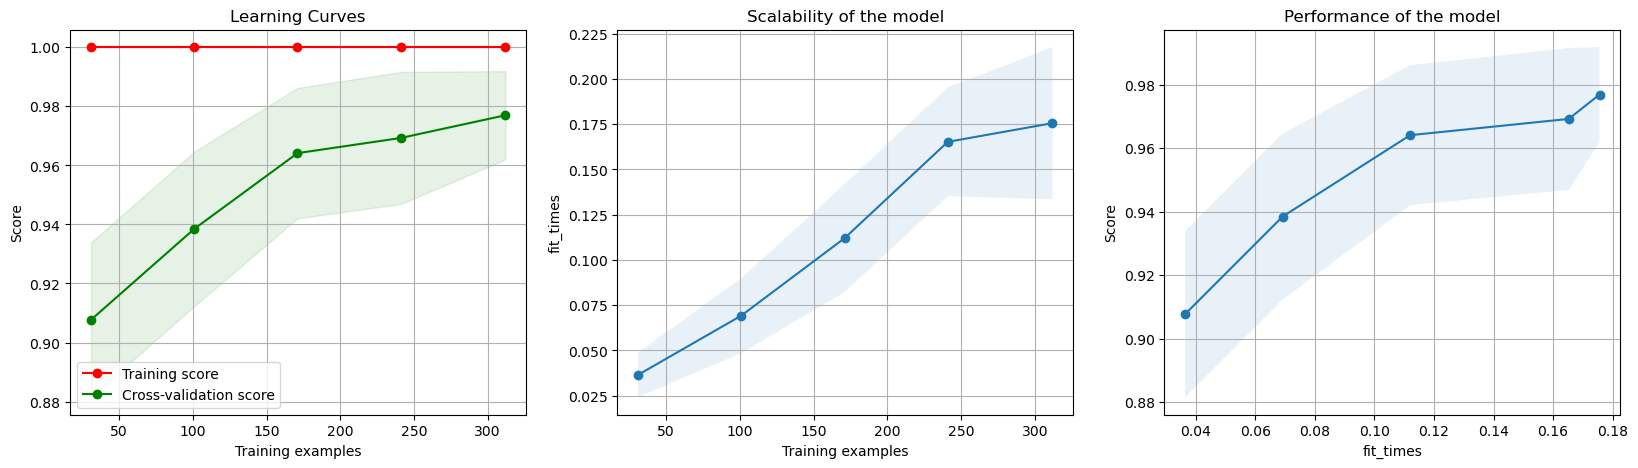

In [235]:
# plot learning curves
plot_learning_curve(best_estimator_pipeline3, 'Learning Curves',
                    X_train_final, y_train, n_jobs=-1)


#### <font color = 'blue'> INFERENCE:</font> The learning curve depicts that the model seems to overfit the data with CV score increasing with data size. The Model capacity looks promising

### <font color = 'blue'>**Check Cross Validation Score and Train Score**

In [241]:
# let's check the train scores
print('train scores: ',best_estimator_pipeline3.score(X_train_final, y_train))

# let's check the cross validation score
print('cross validation score: ', complete_grid_pipeline3.best_score_)


train scores:  1.0
cross validation score:  0.9494267168789676


### <font color ='blue'>**Evaluate model on test datset (transformed)**

In [242]:
X_test.shape


(167,)

In [245]:
# Final Pipeline
def final_pipeline(text, classifier=None):
    cleaned_text = cp.SpacyPreprocessor(model='en_core_web_sm').transform(text)
    # cleaned_text = joblib.load(file_X_test_cleaned_sparse_embed)
    X_features, feature_names = featurizer.fit_transform(text)
    X_final = pd.concat((pd.DataFrame(cleaned_text, columns=['cleaned_text']),
                         pd.DataFrame(X_features, columns=feature_names)), axis=1)
    best_estimator_pipeline3 = classifier
    predictions = best_estimator_pipeline3.predict(X_final)
    return predictions


In [246]:
# predicted values for Test data set
y_test_pred3 = final_pipeline(X_test, grid_classifier_3)


/Users/rechitasingh/Downloads/BUAN 6342 - NLP/0_Python_Scripts/custom_preprocessor_mod.py:90: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


### <font color ='blue'>**Classification report for test dataset**

In [247]:
print('\nTest set classification report:\n\n',
      classification_report(y_test, y_test_pred3))



Test set classification report:

               precision    recall  f1-score   support

         ham       0.97      1.00      0.99       146
        spam       1.00      0.81      0.89        21

    accuracy                           0.98       167
   macro avg       0.99      0.90      0.94       167
weighted avg       0.98      0.98      0.97       167



## <font color = 'blue'> SAve the model down - Pipeline 3
   

In [248]:
file_best_estimator_pipeline3 = model_folder / \
    'pipeline3_best_estimator.pkl'
file_complete_grid_pipeline3 = model_folder / \
    'pipeline3_complete_grid.pkl'


In [249]:
joblib.dump(grid_classifier_3.best_estimator_,
            file_best_estimator_pipeline3)
joblib.dump(grid_classifier_3, file_complete_grid_pipeline3)


['/Users/rechitasingh/Downloads/BUAN 6342 - NLP/0_Data/pipeline3_complete_grid.pkl']


### <font color='blue'>Comparing Classification report from Pipeline 2 and 3</font>

To compare the two classification reports from Pipeline2 and Pipeline3 and determine which one is better, we can consider several factors:

**Precision, Recall, and F1-Score for the 'ham' Class:**
1. In Pipeline2, the precision, recall, and F1-score for the 'ham' class are 0.99, 0.99, and 0.99, respectively.
2. In Pipeline3, the precision, recall, and F1-score for the 'ham' class are 0.97, 1.00, and 0.99, respectively.
3. Pipeline3 has a slightly lower precision but perfect recall for the 'ham' class.


**Precision, Recall, and F1-Score for the 'spam' Class:**
1. In Pipeline2, the precision, recall, and F1-score for the 'spam' class are 0.95, 0.90, and 0.93, respectively.
2. In Pipeline3, the precision, recall, and F1-score for the 'spam' class are 1.00, 0.81, and 0.89, respectively.
3. Pipeline2 has a slightly lower precision but higher recall and F1-score for the 'spam' class.


**Based on the comparison, Pipeline2 may be considered better overall because it achieves a better balance between precision and recall for both classes and has higher macro and weighted average F1-scores**


### <font color='blue'>Further comparing the overall scores for picking FINAL model</font>





In [253]:
print('train scores - Pipeline1: ',best_estimator_pipeline1.score(
    X_train_processed, y_train))
print('cross validation score - Pipeline1: ',complete_grid_pipeline1.best_score_)
print('\n')

print('train scores - Pipeline2: ',best_estimator_pipeline2.score(X_train_features, y_train))
print('cross validation score  - Pipeline2: ', complete_grid_pipeline2.best_score_)

print('\n')

print('train scores - Pipeline3: ',best_estimator_pipeline3.score(X_train_final, y_train))
print('cross validation score - Pipeline3: ', complete_grid_pipeline3.best_score_)


train scores - Pipeline1:  1.0
cross validation score - Pipeline1:  0.8463280244902887


train scores - Pipeline2:  0.9717948717948718
cross validation score  - Pipeline2:  0.9255027869733752


train scores - Pipeline3:  1.0
cross validation score - Pipeline3:  0.9494267168789676


### <font color='blue'>Final model selection reasoning:</font>

1. In terms of learning curves and test & CV scores, **Pipeline 3 seems to be working best**
2. In terms of Classification report, Pipeline2 is performing slighly better that Pipeline3 results. And both of them exceeds pipeline1 results

**Overall, I will pick Pipeline3 based on the fact that the model seems to perfectly overfit the data in pipeline 3.** Although it had an upward trend in pipeline2 and with increased data it would seem to have performed better. Pipeline3 includes characteristics of Pipeline2 and ensamble methods have performed better for many cases.

**Hence I will go with model build in Pipeline3 to train the larger dataset**

## <font color='blue'>Saving down required files for Model training</font>

**saving the original train and test split files after preprocessing**

In [254]:
# Saving cleaned training data
X_train_org_cleaned = cp.SpacyPreprocessor(
    model='en_core_web_sm').transform(X_train_org)

file_X_train_org_cleaned_sparse_embed = data_folder / \
    'x_train_org_cleaned_sparse_embed.pkl'
joblib.dump(X_train_org_cleaned, file_X_train_org_cleaned_sparse_embed)


/Users/rechitasingh/Downloads/BUAN 6342 - NLP/0_Python_Scripts/custom_preprocessor_mod.py:90: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


['/Users/rechitasingh/Downloads/BUAN 6342 - NLP/0_Data/x_train_org_cleaned_sparse_embed.pkl']

In [260]:
#Saving cleaned testing data

X_test_org_cleaned = cp.SpacyPreprocessor(model='en_core_web_sm').transform(X_test_org)
# save  this to a file
file_X_test_org_cleaned_sparse_embed = data_folder / 'x_test_org_cleaned_sparse_embed.pkl'
joblib.dump(X_test_org_cleaned, file_X_test_org_cleaned_sparse_embed)


['/Users/rechitasingh/Downloads/BUAN 6342 - NLP/0_Data/x_test_org_cleaned_sparse_embed.pkl']

In [272]:
#Saving y labels data

#train set
file_y_train_org = data_folder / 'y_train_org.pkl'
joblib.dump(y_train_org, file_y_train_org)

#test set
file_y_test_org = data_folder / 'y_test_org.pkl'
joblib.dump(y_test_org, file_y_test_org)


['/Users/rechitasingh/Downloads/BUAN 6342 - NLP/0_Data/y_test_org.pkl']

## <font color='blue'> ******************************** THE END- FILE 1 ********************************</font>